In [1]:
#pip install torch

In [2]:
# Libs necessárias
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

In [3]:
# --- Criar dados para nosso modelo

# Gerar uma lista com valores de 0 até 10
Dados_x = [ Loop for Loop in range(11) ]

# Converter a lista em um array
x_treino = np.array(Dados_x, dtype=np.float32)

# Acrescenter uma dimensão
x_treino = x_treino.reshape(-1, 1)

# Gerar uma lista multiplicando
Dados_y = [ 2*Loop + 1 for Loop in Dados_x]

# Converter a lista em um array
y_treino = np.array(Dados_y, dtype=np.float32)

# Gerar uma lista multiplicando
y_treino = y_treino.reshape(-1, 1)

# Verificando dimensão de mabos array
print( x_treino.shape, y_treino.shape )

(11, 1) (11, 1)


In [4]:
# Arquitetura do Modelo

# Criando uma classe com os parametros da regressão
class linearRegression(torch.nn.Module):

    # Metodo construtuor (irá recever valor de entrada e saida)
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        # Aplicando uma transformação linear
        self.linear = torch.nn.Linear(inputSize, outputSize)

    # Definindo a saida
    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
# ---- Instanciando o modelo

# Dados de entrada do x 
Amostra_Entrada = 1

# Dados de entrada do x
Amostra_Saida = 1

# Taxa de aprendizagem do modelo
Taxa_Aprendizagem = 0.01 

# Epocas do treinamento
Epocas = 100

# Atribuindo o Modelo
Modelo_Linear = linearRegression(Amostra_Entrada, Amostra_Saida)

# Uso da GPU com o CUDA caso tenha uma placa compativel
if torch.cuda.is_available():
    Modelo_Linear.cuda()

# Definir critério que mede o erro quadrático médio (norma L2 quadrado) entre cada elemento na entrada xx e alvo yy.
Criterio_Erro = torch.nn.MSELoss() 

# Definir o algoritmo de otimização para o modelo
Otimizador = torch.optim.SGD(Modelo_Linear.parameters(), lr=Taxa_Aprendizagem)

# Loop no modelo
for Epoca in range(Epocas):

    # Caso seja compativel utilizaremos o CUDA

    # Converter os dados de entradas para variaveis
    if torch.cuda.is_available():
        Entrada = Variable(torch.from_numpy(x_treino).cuda())
        Rotulos = Variable(torch.from_numpy(y_treino).cuda())

    else:
        Entrada = Variable(torch.from_numpy(x_treino))
        Rotulos = Variable(torch.from_numpy(y_treino))

    # Limpar os buffers do gradiente porque não queremos que nenhum gradiente da época anterior seja levado adiante, 
    # não queremos acumular gradientes
    Otimizador.zero_grad()

    # Obter a saida do modelo da regressão
    Saida = Modelo_Linear(Entrada)

    # Obter a perda do modelo
    Perda = Criterio_Erro(Saida, Rotulos)
    print(Perda)

    # Obter gradientes para parâmetros
    Perda.backward()

    # Atualizar parâmetros
    Otimizador.step()

    print('Epoca {}, Perda {}'.format(Epoca, Perda.item()), '\n' )

tensor(260.5534, grad_fn=<MseLossBackward0>)
Epoca 0, Perda 260.5533752441406 

tensor(21.3749, grad_fn=<MseLossBackward0>)
Epoca 1, Perda 21.374881744384766 

tensor(1.8645, grad_fn=<MseLossBackward0>)
Epoca 2, Perda 1.8644795417785645 

tensor(0.2717, grad_fn=<MseLossBackward0>)
Epoca 3, Perda 0.2717280685901642 

tensor(0.1405, grad_fn=<MseLossBackward0>)
Epoca 4, Perda 0.1404757797718048 

tensor(0.1284, grad_fn=<MseLossBackward0>)
Epoca 5, Perda 0.12844879925251007 

tensor(0.1262, grad_fn=<MseLossBackward0>)
Epoca 6, Perda 0.12616151571273804 

tensor(0.1247, grad_fn=<MseLossBackward0>)
Epoca 7, Perda 0.12468300014734268 

tensor(0.1233, grad_fn=<MseLossBackward0>)
Epoca 8, Perda 0.12328514456748962 

tensor(0.1219, grad_fn=<MseLossBackward0>)
Epoca 9, Perda 0.12190797179937363 

tensor(0.1205, grad_fn=<MseLossBackward0>)
Epoca 10, Perda 0.12054646015167236 

tensor(0.1192, grad_fn=<MseLossBackward0>)
Epoca 11, Perda 0.11920063942670822 

tensor(0.1179, grad_fn=<MseLossBackward0>

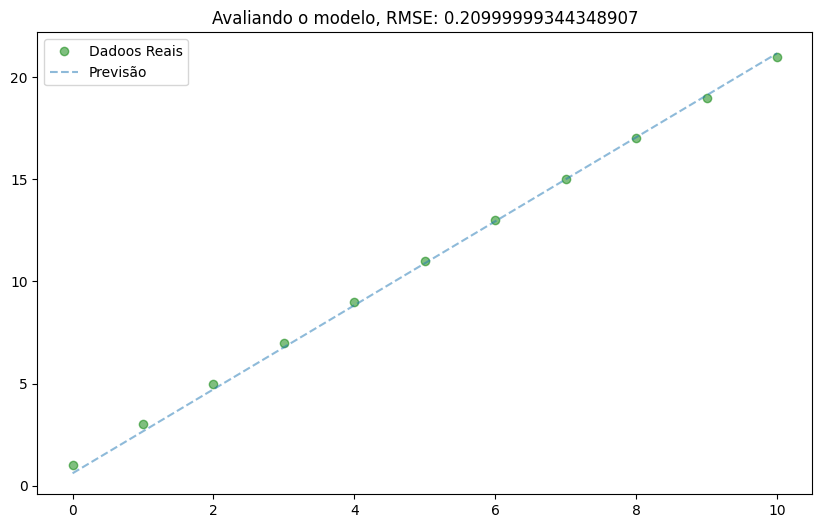

In [8]:
# Avaliando a performance do Modelo

# Anulando o gradiente na fase de teste
with torch.no_grad():

    # Verificar o uso da GPU
    if torch.cuda.is_available():
        # Fazendo a previsão
        Previsao = Modelo_Linear(Variable(torch.from_numpy(x_treino).cuda())).cpu().data.numpy()

    else:
        # Fazendo a previsão
        Previsao = Modelo_Linear(Variable(torch.from_numpy(x_treino))).data.numpy()

# Função do Sklear para erro
from sklearn.metrics import mean_squared_error
RMSE = round( mean_squared_error( y_treino, Previsao, squared=False), 2 )

# Estilo dark
#plt.style.use()
# Tamanho do gráfico
plt.figure( figsize=(10,6) )
plt.clf() # Limpando
plt.plot(x_treino, y_treino, 'go', label='Dadoos Reais', alpha=0.5) # Plot real
plt.plot(x_treino, Previsao, '--', label='Previsão', alpha=0.5) # Plot previsão
plt.legend(loc='best') # Legenda
plt.title(f'Avaliando o modelo, RMSE: {RMSE}') # Titulo
plt.show()